## ESERCIZIO 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eta = 1
f = lambda x : ( x[0]**2 + eta*x[1]**2 ) / 2

In [ ]:
f = lambda x : ( x[0]**2 + eta*x[1]**2 ) / 2
x= np.linspace(-1,1,101)
y = np.linspace(-1,1,101)
[XX,YY] = np.meshgrid(x,y)
F = ( XX ** 2 + eta * YY ** 2 ) / 2

In [5]:
XX

array([[-1.  , -0.98, -0.96, ...,  0.96,  0.98,  1.  ],
       [-1.  , -0.98, -0.96, ...,  0.96,  0.98,  1.  ],
       [-1.  , -0.98, -0.96, ...,  0.96,  0.98,  1.  ],
       ...,
       [-1.  , -0.98, -0.96, ...,  0.96,  0.98,  1.  ],
       [-1.  , -0.98, -0.96, ...,  0.96,  0.98,  1.  ],
       [-1.  , -0.98, -0.96, ...,  0.96,  0.98,  1.  ]])

(-1.0, 1.0, -1.0, 1.0)

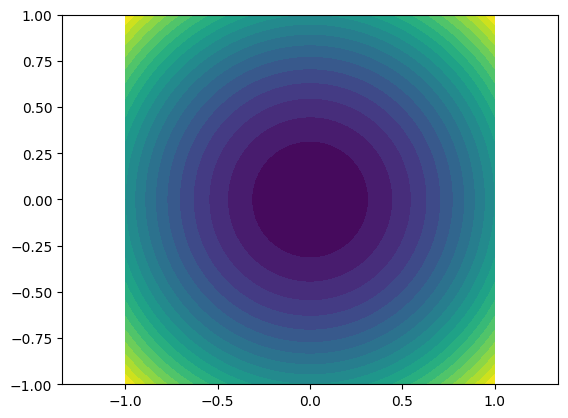

In [ ]:
plt.contourf(XX,YY,F,20)
plt.axis('equal')

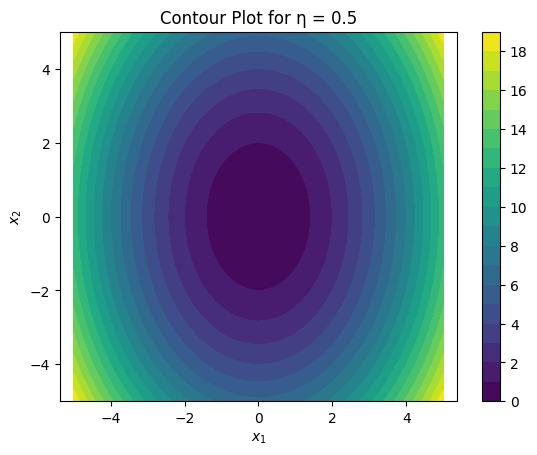

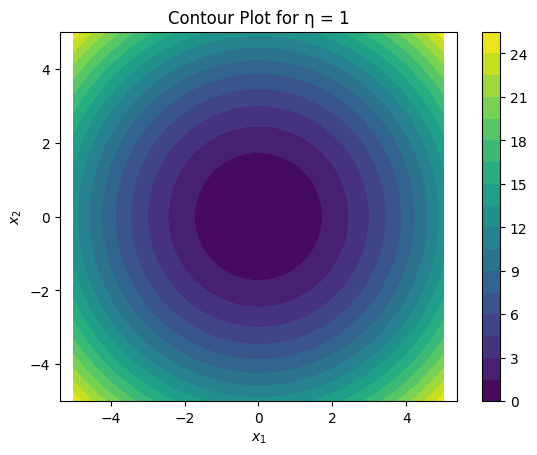

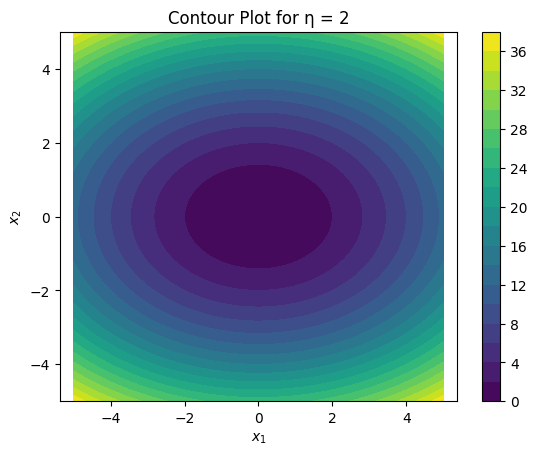

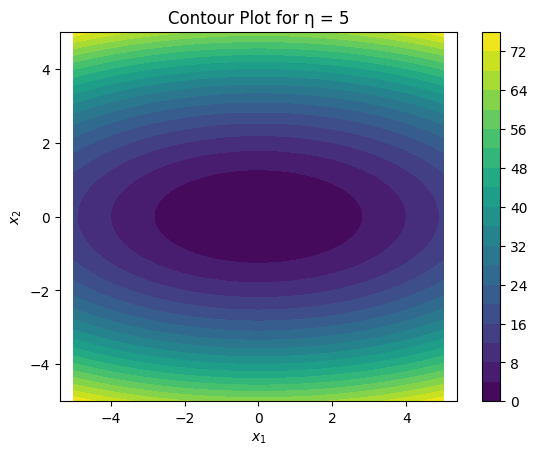

In [6]:
# Parameters
xmin, xmax = -5, 5
ymin, ymax = -5, 5
Nx, Ny = 100, 100  # Resolution of the grid
etas = [0.5, 1, 2, 5]  # Different values of η
Ncontour = 20  # Number of contour levels

# Loop through different values of η
for eta in etas:
    x = np.linspace(xmin, xmax, Nx)
    y = np.linspace(ymin, ymax, Ny)
    XX, YY = np.meshgrid(x, y)
    F = (XX ** 2 + eta * YY ** 2) / 2

    plt.figure()
    plt.contourf(XX, YY, F, Ncontour, cmap="viridis")
    plt.colorbar()
    plt.title(f'Contour Plot for η = {eta}')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')  # Ensure the aspect ratio is 1:1
    plt.show()

### How does η impact on the numerical solution of the problem ?
The problem involves minimizing the quadratic function:

$$
f(x) = \frac{1}{2}(x_1^2 + \eta x_2^2),
$$

where the parameter $\eta$ affects both the geometry of the function and the behavior of the gradient descent (GD) algorithm.

ELONGATION OF THE ELLIPSIS

In [20]:
eta=1
f = lambda x : ( x[0]**2 + eta*x[1]**2 ) / 2
x= np.linspace(-1,1,101)
y = np.linspace(-1,1,101)
[XX,YY] = np.meshgrid(x,y)
F = ( XX ** 2 + eta * YY ** 2 ) / 2

In [21]:
Gradf = lambda x : np.array([x[0],eta*x[1]])

In [22]:
tau = 2/eta-0.3

In [23]:
x0 = np.array( [.9,.3] )

In [24]:
def GD(Gradf, x0, tau, max_iter=100, tol=1e-6):
  """
  GD method.

  Args:
    Gradf: A function that returns the gradient of the objective function.
    x0: The initial guess for the minimum.
    tau: The step size.
    max_iter: The maximum number of iterations.
    tol: The tolerance for convergence.
  """
  sol = [x0]
  x = x0
  for i in range(max_iter):
    grad = Gradf(x)
    x_next = x - tau * grad
    if np.linalg.norm(x_next - x) < tol:
      break
    x = x_next
    sol = np.append(sol,[x],axis=0)
  return sol,i

In [25]:
sol = GD(Gradf, x0, tau, max_iter=100, tol=1e-6)

In [26]:
sol[1]

41

In [27]:
sol[0]

array([[ 9.00000000e-01,  3.00000000e-01],
       [-6.30000000e-01, -2.10000000e-01],
       [ 4.41000000e-01,  1.47000000e-01],
       [-3.08700000e-01, -1.02900000e-01],
       [ 2.16090000e-01,  7.20300000e-02],
       [-1.51263000e-01, -5.04210000e-02],
       [ 1.05884100e-01,  3.52947000e-02],
       [-7.41188700e-02, -2.47062900e-02],
       [ 5.18832090e-02,  1.72944030e-02],
       [-3.63182463e-02, -1.21060821e-02],
       [ 2.54227724e-02,  8.47425747e-03],
       [-1.77959407e-02, -5.93198023e-03],
       [ 1.24571585e-02,  4.15238616e-03],
       [-8.72001094e-03, -2.90667031e-03],
       [ 6.10400766e-03,  2.03466922e-03],
       [-4.27280536e-03, -1.42426845e-03],
       [ 2.99096375e-03,  9.96987917e-04],
       [-2.09367463e-03, -6.97891542e-04],
       [ 1.46557224e-03,  4.88524079e-04],
       [-1.02590057e-03, -3.41966856e-04],
       [ 7.18130397e-04,  2.39376799e-04],
       [-5.02691278e-04, -1.67563759e-04],
       [ 3.51883894e-04,  1.17294631e-04],
       [-2.

(-1.0, 1.0, -1.0, 1.0)

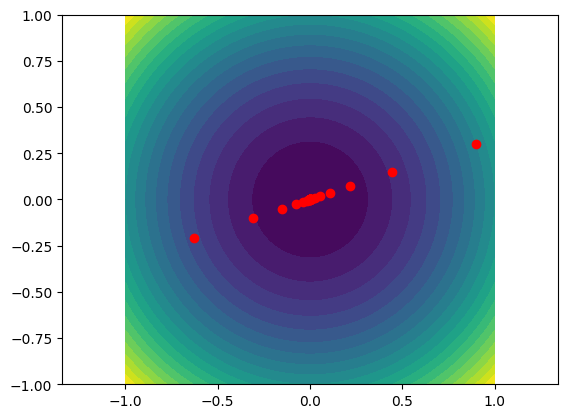

In [28]:
plt.contourf(XX,YY,F,20)
P = sol[0]
plt.plot(P[:,0],P[:,1],'ro')
plt.axis('equal')

In [30]:
import sympy as sy
x, y, eta = sy.symbols('x y eta')

In [31]:
F = 0.5*(x**2 + eta*y**2)

In [32]:
sy.diff(F,x)

1.0*x

In [33]:
H = sy.Matrix([[1,0],[0,eta]])

In [34]:
H

Matrix([
[1,   0],
[0, eta]])

In [35]:
H.norm(1)

Max(1, Abs(eta))

In [38]:
def GD1(Gradf, x0, max_iter=100, tol=1e-6):
  """
  GD method.

  Args:
    Gradf: A function that returns the gradient of the objective function.
    x0: The initial guess for the minimum.
    tau: HARDCODED
    max_iter: The maximum number of iterations.
    tol: The tolerance for convergence.

  """
  sol = [x0]
  x = x0
  for i in range(max_iter):
    grad = Gradf(x)
    tau = (x[0]**2+0.4*x[1]**2)/(x[0]**2+0.4**2*x[1]**2)
    x_next = x - tau * grad
    if np.linalg.norm(x_next - x) < tol:
      break
    x = x_next
    sol = np.append(sol,[x],axis=0)
  return sol,i

In [39]:
sol1 = GD1(Gradf, x0, max_iter=100, tol=1e-6)

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable sqrt method

In [ ]:
sol1[1]

4

In [ ]:
plt.contourf(XX,YY,F,20)
P = sol1[0]
plt.plot(P[:,0],P[:,1],'ro')
plt.axis('equal')

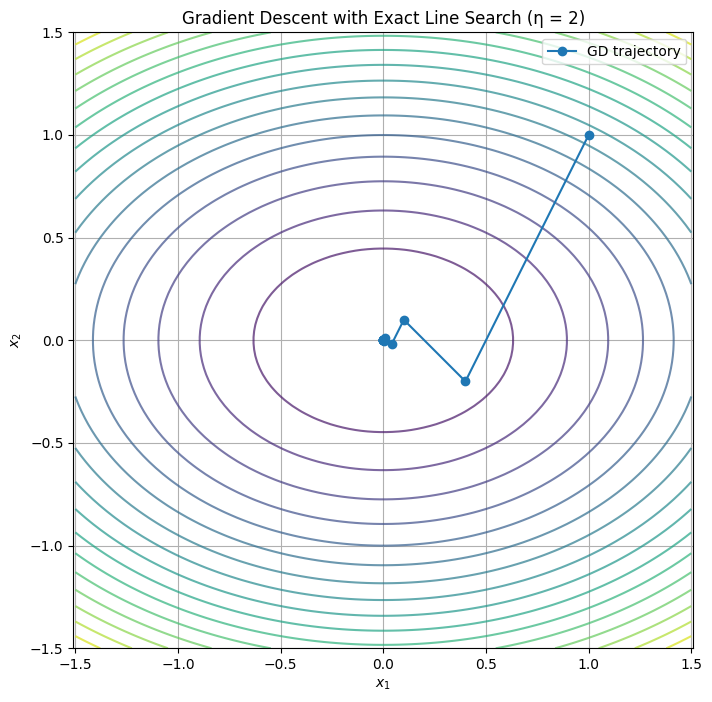

Number of iterations: 13
Final point: [ 4.e-07 -2.e-07]


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function gradient
def Gradf(x, eta):
    """Gradient of the quadratic function."""
    return np.array([x[0], eta * x[1]])

# Define the exact line search gradient descent
def GD_exact_line_search(Gradf, x0, eta, max_iter=100, tol=1e-6):
    """
    Gradient Descent with Exact Line Search.

    Args:
        Gradf: A function that computes the gradient of f.
        x0: Initial point (numpy array).
        eta: Parameter in the quadratic function.
        max_iter: Maximum number of iterations.
        tol: Convergence tolerance.

    Returns:
        sol: Array of points visited during optimization.
        num_iter: Number of iterations performed.
    """
    sol = [np.array(x0)]  # Store trajectory
    x = np.array(x0)      # Current point
    for i in range(max_iter):
        grad = Gradf(x, eta)  # Compute gradient
        # Compute the exact step size
        tau = (x[0]**2 + eta * x[1]**2) / (x[0]**2 + eta**2 * x[1]**2)
        x_next = x - tau * grad  # Update the point
        # Check for convergence
        if np.linalg.norm(x_next - x) < tol:
            break
        x = x_next
        sol.append(x)  # Store the updated point
    return np.array(sol), i

# Parameters
eta = 2  # Curvature parameter
x0 = [1.0, 1.0]  # Initial point
max_iter = 100
tol = 1e-6

# Run Gradient Descent with exact line search
sol, num_iter = GD_exact_line_search(Gradf, x0, eta, max_iter, tol)

# Plot the results
x1_vals = sol[:, 0]
x2_vals = sol[:, 1]

# Create the contour plot of the function
x1 = np.linspace(-1.5, 1.5, 100)
x2 = np.linspace(-1.5, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)
F = 0.5 * (X1**2 + eta * X2**2)

plt.figure(figsize=(8, 8))
plt.contour(X1, X2, F, levels=20, cmap="viridis", alpha=0.7)
plt.plot(x1_vals, x2_vals, 'o-', label="GD trajectory")
plt.title(f"Gradient Descent with Exact Line Search (η = {eta})")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

# Display results
print(f"Number of iterations: {num_iter}")
print(f"Final point: {sol[-1]}")
